In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/two_classset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [64]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/two_classset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 20,
    image_size=(227,227)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/two_classset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 20,
    image_size=(227,227)
)

Found 4500 files belonging to 2 classes.
Found 1090 files belonging to 2 classes.


In [67]:
#create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(227,227,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [68]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 225, 225, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 225, 225, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 110, 110, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 110, 110, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 193600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 300)                 │      58,080,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,130,277 (221.75 MB)

 Trainable params: 58,130,085 (221.75 MB)

 Non-trainable params: 192 (768.00 B)

In [69]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
#normalize
def process(image,label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [71]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7043 - loss: 6.3793 - val_accuracy: 0.3807 - val_loss: 11.0028
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7934 - loss: 0.7592 - val_accuracy: 0.5569 - val_loss: 0.9796
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7924 - loss: 0.4748 - val_accuracy: 0.8165 - val_loss: 0.4141
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8185 - loss: 0.4684 - val_accuracy: 0.8963 - val_loss: 0.3116
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8557 - loss: 0.3224 - val_accuracy: 0.6220 - val_loss: 5.2880
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8704 - loss: 0.2755 - val_accuracy: 0.8899 - val_loss: 0.2965
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8822 - loss: 0.2641 - val_accuracy: 0.7147 - val_loss: 0.6267
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8762 - loss: 0.2724 - va

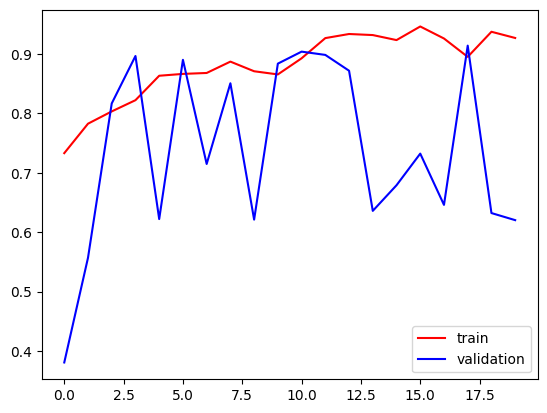

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

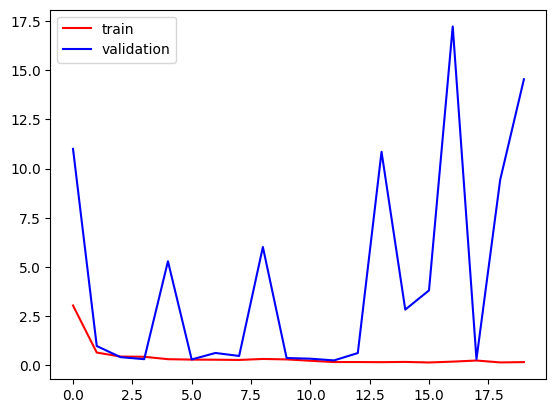

In [73]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step


array([[0.]], dtype=float32)

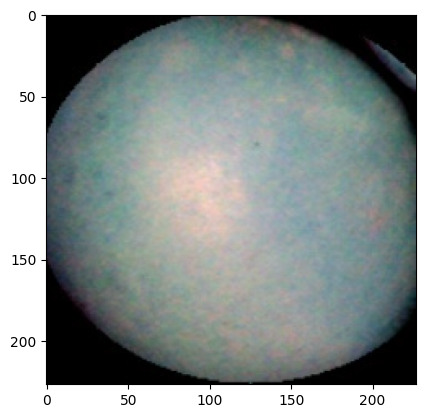

In [74]:
#verification
import cv2
test_img = cv2.imread('/content/two_classset/intact7.jpg')
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img,(227,227))
test_input = test_img.reshape((1,227,227,3))
model.predict(test_input)